# Capstone Project - HR Analysis

###### Done by: S.Dhanasree

# Problem Statement
Given data we have to identify how salary is varying with respect to other considerable factors.

###### MY UNDERSTANDING:
So, Here the motto is the find the varaiables that influence the salary column. I am convinved that this is a regression problem.
I will follow these steps to model the data.
1. I wil check the data and anlayse for insights.
2.Will do data cleaning and engineering where ever necessary.
3.If there is a linear relationship will the features and target i will go with Linear regression.
4.If the data fails to exhibit linear relationship,I will choose the non-linear regression model.
5.Will tune hyperparameters and perform Cross-Validations if necessary.
6.Check the behaviour of the model with other model.
7.Which model yields the best score will be taken into count.

In [1]:
#Importing all the libraries needed for the process

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv data into a varaiable named hr_data

In [2]:
hr_data=pd.read_csv("D:/Sweety/Datasets/HRdataset.csv")

In [3]:
hr_data.head(10)

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,400184.25,167411.18,126.250000,2163600,123.430000,125.839996,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,137811.38,155966.02,125.540001,2386400,125.239998,119.980003,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.60,212739.13,119.739998,2489500,116.379997,114.949997,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,198306.90,77916.00,117.440002,2006300,115.480003,116.620003,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,182234.59,134401.60,117.330002,1408600,117.010002,114.970001,114.089996
5,Female,0,44,149756.71,No,8,Yes,Month-to-month,Yes,99.65,820.5,Yes,189082.74,118602.00,116.059998,1098000,115.510002,115.550003,114.500000
6,Male,0,50,10062.80,Yes,22,Yes,Month-to-month,Yes,89.10,1949.4,No,134426.14,92492.01,117.070000,949600,116.459999,112.849998,112.589996
7,Female,0,29,119346.88,No,10,No,Month-to-month,No,29.75,301.9,No,51322.50,256576.96,115.029999,785300,113.510002,114.379997,110.050003
8,Female,0,44,74940.50,No,28,Yes,Month-to-month,Yes,104.80,3046.05,Yes,40132.23,176932.64,114.879997,1093700,113.330002,112.529999,111.919998
9,Male,0,27,71725.73,Yes,62,Yes,One year,No,56.15,3487.95,No,17115.73,285262.00,115.870003,1523500,113.660004,110.379997,109.870003


### Data Analysis and Interpretation

In [4]:
hr_data.shape

(5049, 19)

In [5]:
hr_data.describe()

,Business,Age,Salary,Months,Unit_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000,5049.000000,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,12686.158334,125667.312171,51.224542,6.735758e+06,43.517670,43.581984,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,16020.185731,27660.975992,52.061379,1.613986e+07,37.111517,37.074444,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,0.000000,0.000000,1.440000,0.000000e+00,3.680000,3.680000,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,3071.600000,105934.710000,25.760000,1.281700e+06,21.980000,22.024999,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,10114.010000,123105.000000,39.240002,2.864200e+06,33.299999,33.340000,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,17176.630000,138854.690000,58.590000,6.205100e+06,51.130001,51.209946,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,400184.250000,294580.020000,629.511067,3.208684e+08,313.903904,313.688694,312.432438


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5049 non-null   object 
 1   Business        5049 non-null   int64  
 2   Age             5049 non-null   int64  
 3   Salary          5049 non-null   float64
 4   Dependancies    5049 non-null   object 
 5   Months          5049 non-null   int64  
 6   Calls           5049 non-null   object 
 7   Type            5049 non-null   object 
 8   Billing         5049 non-null   object 
 9   Unit_Sales      5049 non-null   float64
 10  Total_Sales     5049 non-null   object 
 11  Rating          5049 non-null   object 
 12  Bonus           5049 non-null   float64
 13  BasePay         5049 non-null   float64
 14  Unit_Price      5049 non-null   float64
 15  Volume          5049 non-null   int64  
 16  openingbalance  5049 non-null   float64
 17  closingbalance  5049 non-null   f

The data doesnot have any null data and the shape of the dataset is 19 columns and 5049 columns.

In [7]:
hr_data.columns

Index(['Gender', 'Business', 'Age', 'Salary', 'Dependancies', 'Months',
       'Calls', 'Type', 'Billing', 'Unit_Sales', 'Total_Sales', 'Rating',
       'Bonus', 'BasePay', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low'],
      dtype='object')

Here the categorical columns are Gender ,Dependancies,calls ,type ,billing,total_sales and rating.
Though the total_sales column sees like it has numerical values it is given as categorical value. 

First i will visualize all the categorical columns and then the numerical ones.

Now I will analyze categorical columns in the dataset and also how they are related to salary.

<AxesSubplot:xlabel='Gender', ylabel='count'>

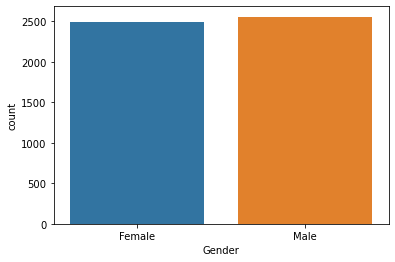

In [8]:
sns.countplot(x="Gender",data=hr_data)

The Gender column has two values Male and female.Here female and male have almost the same values.

<AxesSubplot:xlabel='Dependancies', ylabel='count'>

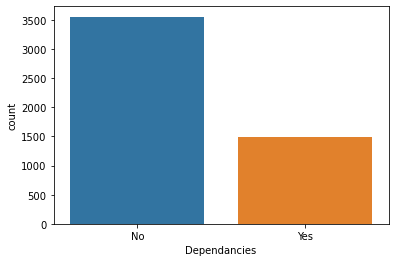

In [9]:
sns.countplot(x='Dependancies',data=hr_data)

The dependancies column has YES or NO values. The majority of values are NO.

<AxesSubplot:xlabel='Calls', ylabel='count'>

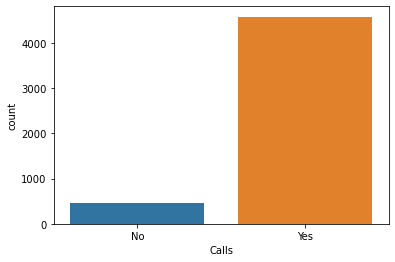

In [10]:
sns.countplot(x='Calls',data=hr_data)

The calls column also has YES and NO values. The majority of values are YES.

<AxesSubplot:xlabel='Type', ylabel='count'>

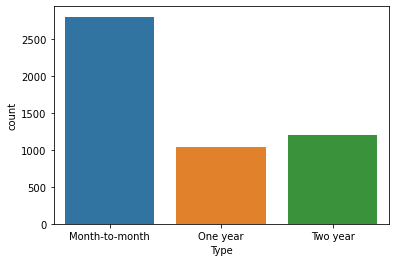

In [11]:
sns.countplot(x='Type',data=hr_data)

The type column has three categories Month-to-Month, One-year, Two year. While the One year and two year are almost same in 
number the Month-to-Month has the majority of values

<AxesSubplot:xlabel='Billing', ylabel='count'>

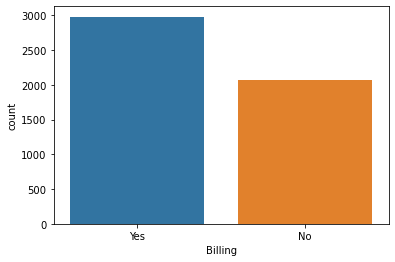

In [12]:
sns.countplot(x='Billing',data=hr_data)

The Billing column has YES and NO values. YES has majority of values.

<AxesSubplot:xlabel='Rating', ylabel='count'>

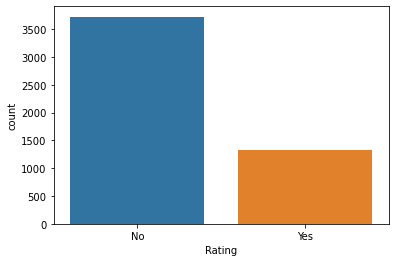

In [13]:
sns.countplot(x="Rating",data=hr_data)

The Rating column also contains YES and NO categories. The NO has the majority of values.

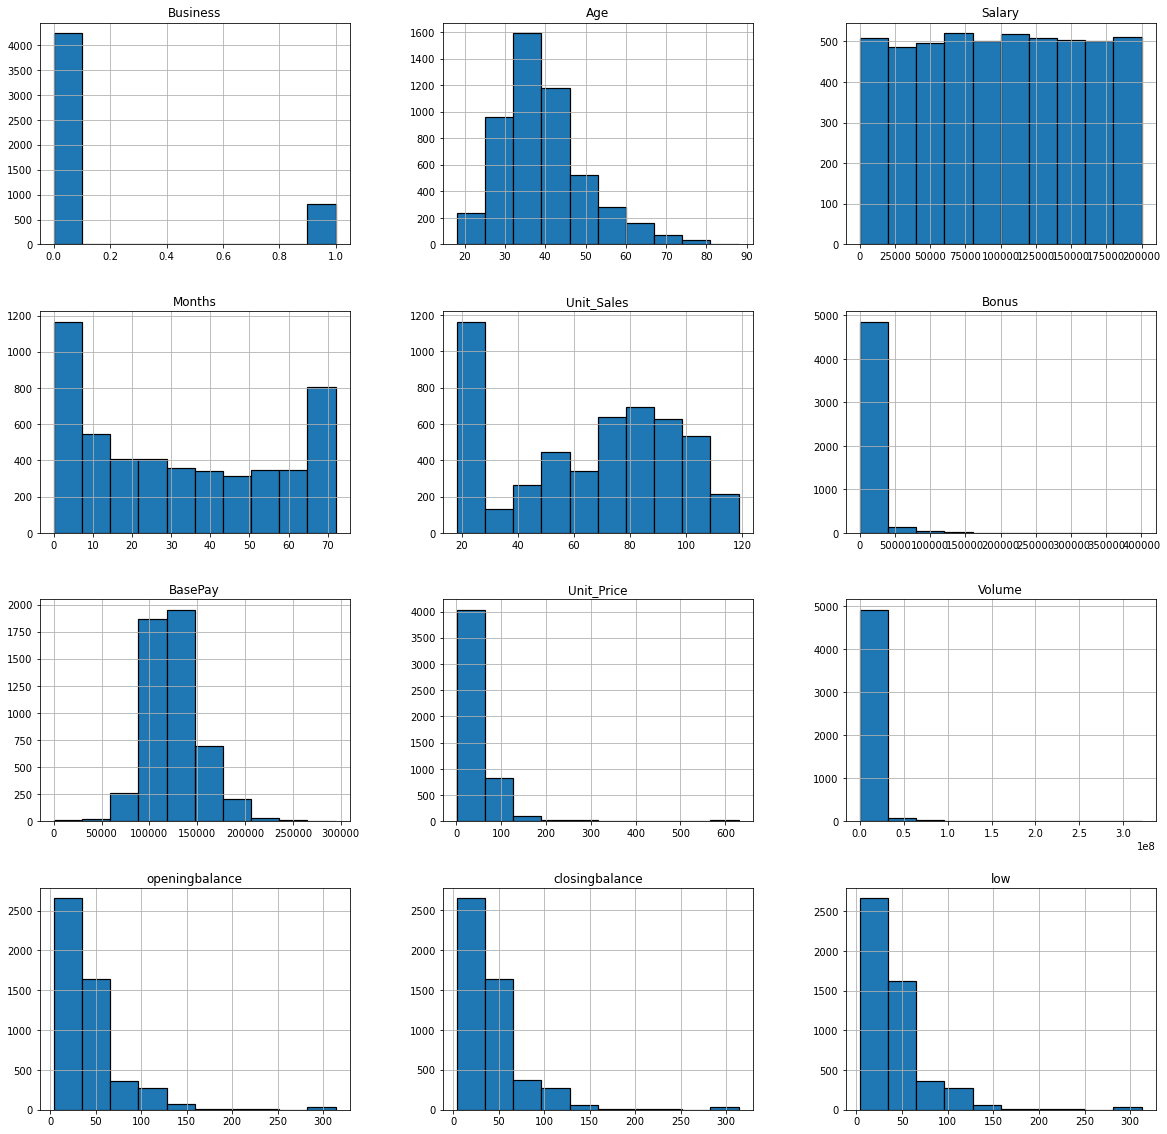

In [14]:
hr_data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Here I visualized all the numerical columns 

1. The Business column seems to have only 0's and 1's. 0's are more than the 1's.
2.The Age column seems like a bit right skewed data. The majority of the age likes between 30-50.
3.The salary columns is uniformly distributed. 
4.The majority of value is near 0 value and above 60 in Months column.
5.The unit_sales has a spike between 20-30 values and has highs and lows from then.
6.The Volume is decreasing gruadaully as the value increases.0-1000 being the start. Also has outliers.
7.The bonus has its values concentrated only between 0-500. There are no significant values after 1500. This shoes that it has extreme values.
8.The majority of basepay is at 100000-150000.
9.The Unit_price has almost most it's values between 0-100. Then few at 600. Also clearly has outliers.
10.The Volume has similar graph as bonus column.
11.The opening_balance, closing_balance, low have the same types of graphs. Where they have high values at the beginning and 
decreasing as the values on x axes increases. These columns also have extreme values.

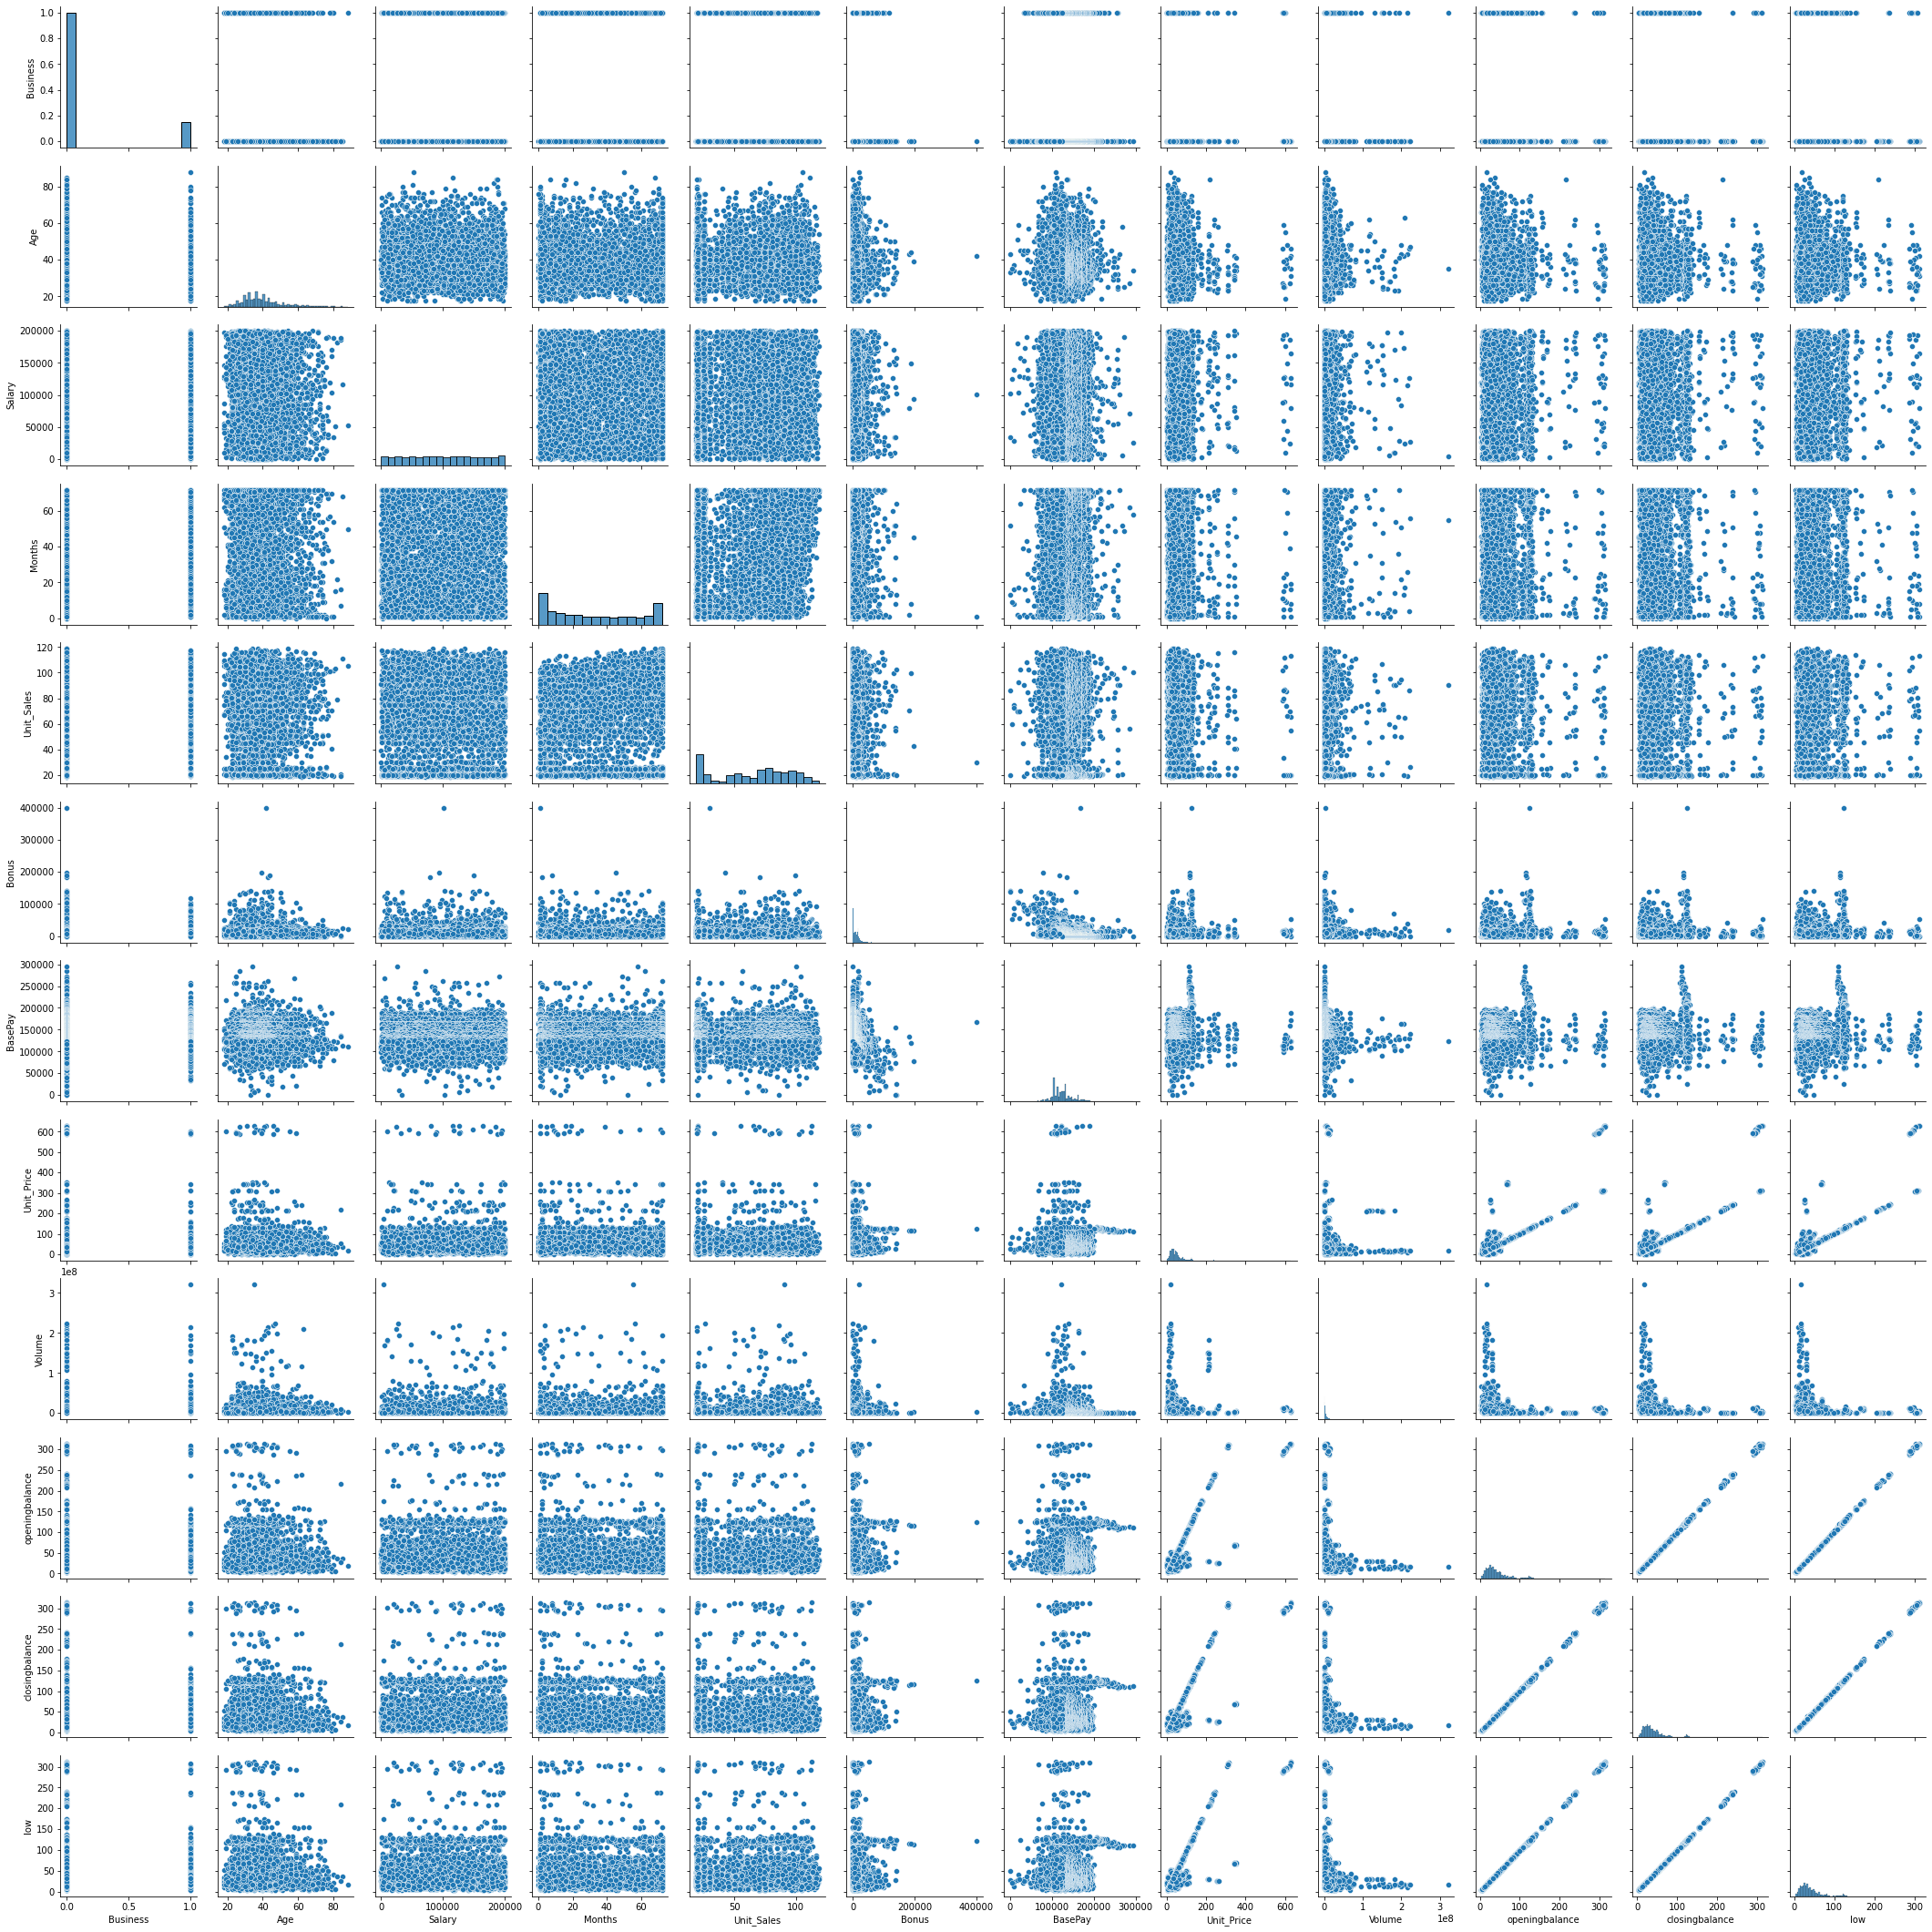

In [15]:
sns.pairplot(hr_data)

A pairs plot allows us to see both distribution of single variables and relationships between two variables using a scatterplot.

From the parplot above 

1. There is no linear realtionship between salary and any other columns in the dataset.
2.Opening_balance,closing_balance,low have a sharp linear relationship with Unit_price column.
3.Opening_balance has a positive linear relationship with closing_balance and low.

There is no significant relationship between any other columns in the dataset.

<AxesSubplot:xlabel='Salary', ylabel='Count'>

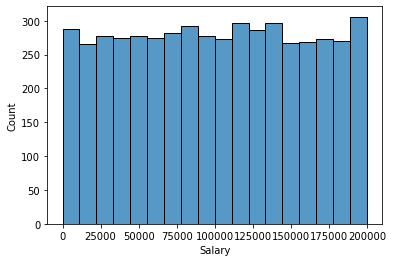

In [241]:
sns.histplot(x='Salary',data=hr_data)

<AxesSubplot:xlabel='Salary'>

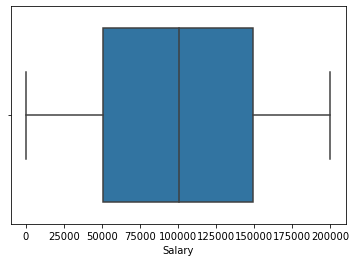

In [242]:
sns.boxplot(x='Salary',data=hr_data)

Visualising the target varaiable salary. It is uniformly distributed and doesnot have any outliers in it.

### Data Cleaning 

Now i will change the Total_Sales column into float as it has continuos values.

In [16]:
hr_data['Total_Sales'] = pd.to_numeric(hr_data['Total_Sales'],errors = 'coerce')

In [17]:
hr_data.dtypes

Gender             object
Business            int64
Age                 int64
Salary            float64
Dependancies       object
Months              int64
Calls              object
Type               object
Billing            object
Unit_Sales        float64
Total_Sales       float64
Rating             object
Bonus             float64
BasePay           float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
dtype: object

Here we see that the data type is change as float value

Checking for outliers in the data

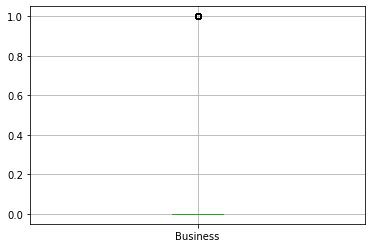

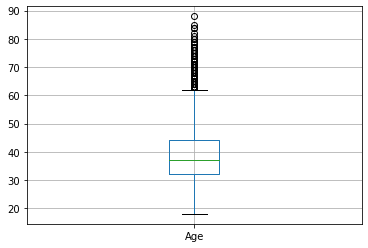

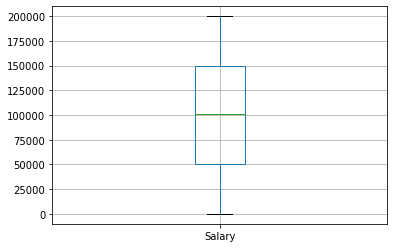

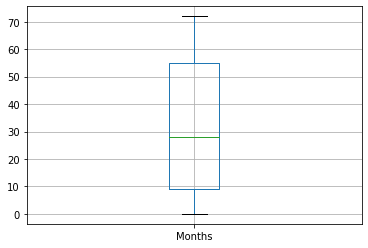

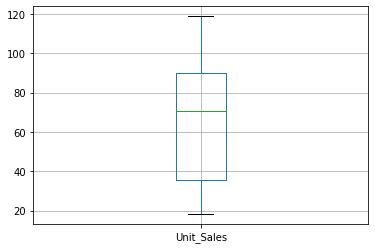

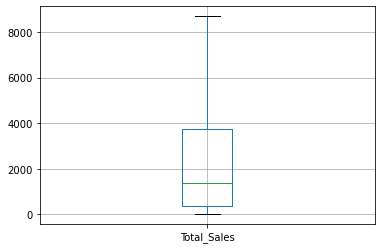

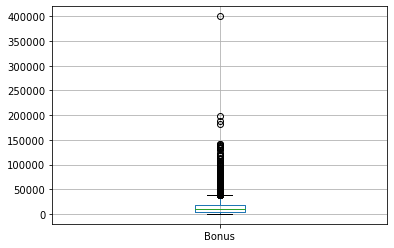

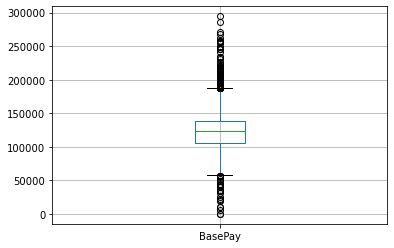

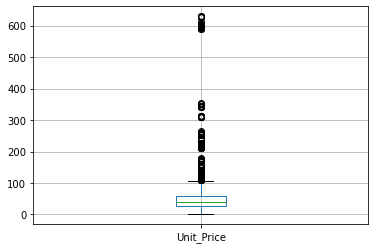

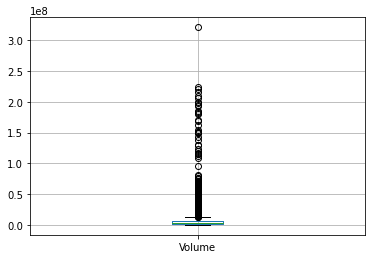

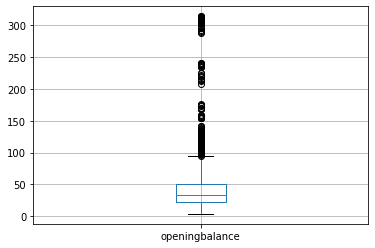

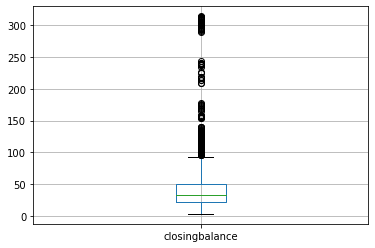

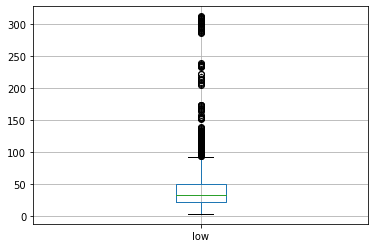

In [18]:
for column in hr_data:
    if hr_data[column].dtype in ['int64', 'float64']:
        plt.figure()
        hr_data.boxplot(column = [column])

The Age, Bonus, BasePAy, Unit_Price, volume, openingbalance,closingbalance and low columns have outliers. Now we have to treat the outliers inorder to make a good model.

I choose median values to replace the outliers and make it less skewed data.
we replace the extreme values with the median or mean value but it is advised not to use the mean values because it is highly susceptible to outliers.

<AxesSubplot:xlabel='Age'>

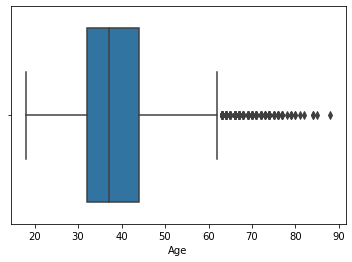

In [19]:
sns.boxplot(x='Age',data=hr_data)

In [20]:
print(hr_data['Age'].quantile(0.75))

44.0


In [21]:
print(hr_data['Age'].median())

37.0


In [22]:
hr_data['Age']=np.where(hr_data['Age']>44.0,37.0,hr_data['Age'])

<AxesSubplot:xlabel='Age'>

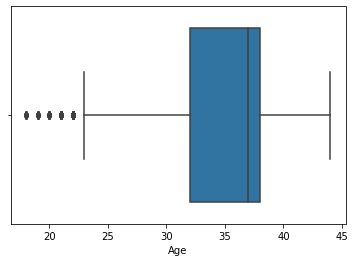

In [23]:
sns.boxplot(x='Age',data=hr_data)

<AxesSubplot:xlabel='Bonus'>

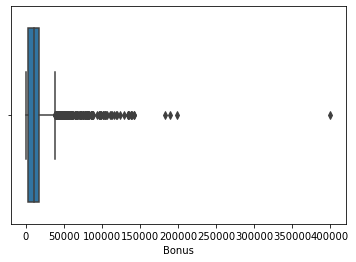

In [24]:
sns.boxplot(x='Bonus',data=hr_data)

In [25]:
print(hr_data['Bonus'].median())

10114.01


In [26]:
print(hr_data['Bonus'].quantile(0.75))

17176.63


<AxesSubplot:xlabel='Bonus'>

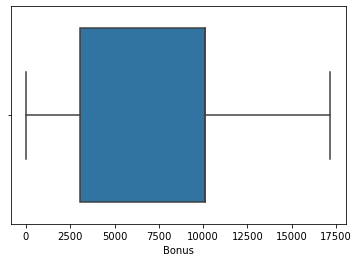

In [27]:
hr_data['Bonus']=np.where(hr_data['Bonus']>17176.63,10114.01,hr_data['Bonus'])
sns.boxplot(x='Bonus',data=hr_data)

<AxesSubplot:xlabel='BasePay'>

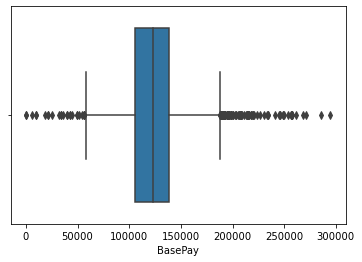

In [28]:
sns.boxplot(x='BasePay',data=hr_data)

In [29]:
print(hr_data['BasePay'].quantile(0.25))
print(hr_data['BasePay'].quantile(0.75))

105934.71
138854.69


In [30]:
print(hr_data['BasePay'].median())

123105.0


<AxesSubplot:xlabel='BasePay'>

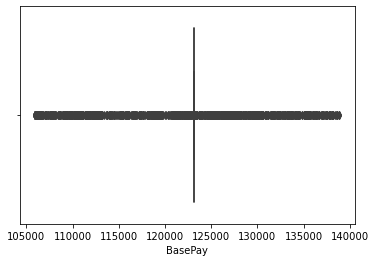

In [31]:
hr_data['BasePay']=np.where(hr_data['BasePay']<105934.71,123105.0,hr_data['BasePay'])
hr_data['BasePay']=np.where(hr_data['BasePay']>138854.69,123105.0,hr_data['BasePay'])

sns.boxplot(x='BasePay',data=hr_data)

<AxesSubplot:xlabel='Unit_Price'>

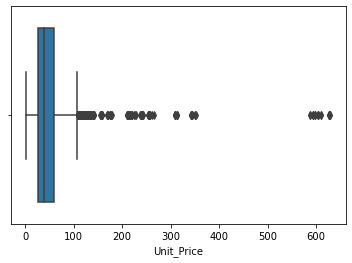

In [32]:
sns.boxplot(x='Unit_Price',data=hr_data)

In [33]:
print(hr_data['Unit_Price'].quantile(0.75))

58.59


In [34]:
print(hr_data['Unit_Price'].median())

39.240002


<AxesSubplot:xlabel='Unit_Price'>

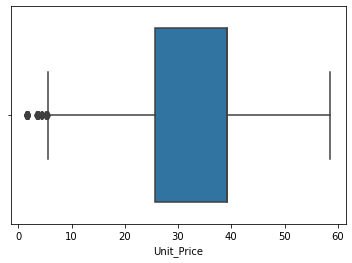

In [35]:
hr_data['Unit_Price']=np.where(hr_data['Unit_Price']>58.59,39.240002,hr_data['Unit_Price'])
sns.boxplot(x='Unit_Price',data=hr_data)

<AxesSubplot:xlabel='Volume'>

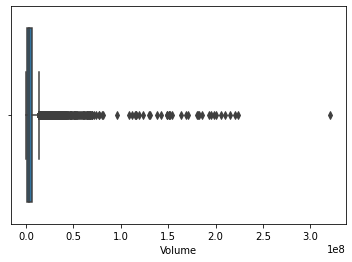

In [36]:
sns.boxplot(x='Volume',data=hr_data)

In [37]:
print(hr_data['Volume'].quantile(0.75))

6205100.0


In [38]:
print(hr_data['Volume'].median())

2864200.0


<AxesSubplot:xlabel='Volume'>

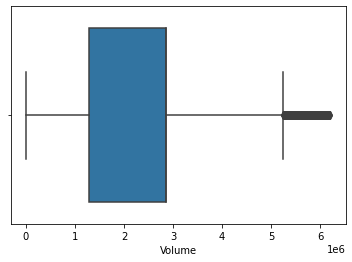

In [39]:
hr_data['Volume']=np.where(hr_data['Volume']>6205100.0,2864200.0,hr_data['Volume'])
sns.boxplot(x='Volume',data=hr_data)

<AxesSubplot:xlabel='openingbalance'>

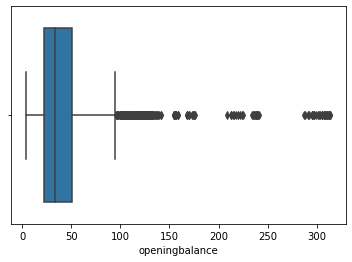

In [40]:
sns.boxplot(x='openingbalance',data=hr_data)

In [41]:
print(hr_data['openingbalance'].quantile(0.75))

51.130001


In [42]:
print(hr_data['openingbalance'].median())

33.299999


<AxesSubplot:xlabel='openingbalance'>

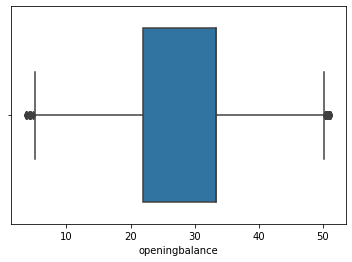

In [43]:
hr_data['openingbalance']=np.where(hr_data['openingbalance']>51.130001,33.299999,hr_data['openingbalance'])
sns.boxplot(x='openingbalance',data=hr_data)

<AxesSubplot:xlabel='closingbalance'>

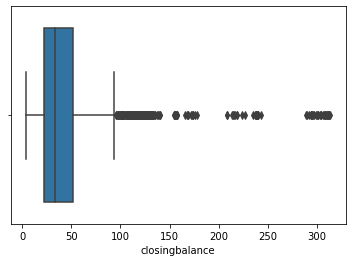

In [44]:
sns.boxplot(x='closingbalance',data=hr_data)

In [45]:
print(hr_data['closingbalance'].quantile(0.75))

51.209946


In [46]:
print(hr_data['closingbalance'].median())

33.34


<AxesSubplot:xlabel='closingbalance'>

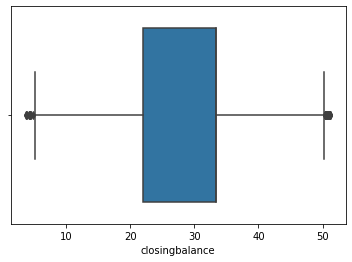

In [47]:
hr_data['closingbalance']=np.where(hr_data['closingbalance']>51.209946,33.34,hr_data['closingbalance'])
sns.boxplot(x='closingbalance',data=hr_data)

<AxesSubplot:xlabel='low'>

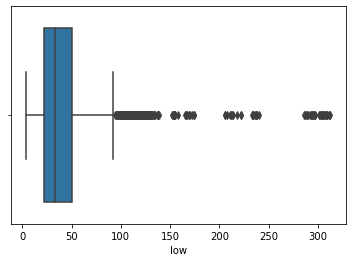

In [48]:
sns.boxplot(x='low',data=hr_data)

In [49]:
print(hr_data['low'].quantile(0.75))

50.529999


In [50]:
print(hr_data['low'].median())

32.93


<AxesSubplot:xlabel='low'>

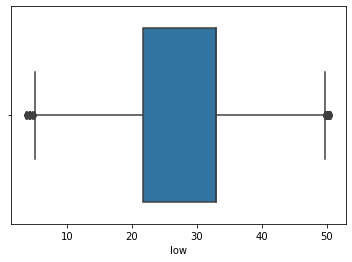

In [51]:
hr_data['low']=np.where(hr_data['low']>50.529999,32.93,hr_data['low'])
sns.boxplot(x='low',data=hr_data)

I used Median to replace the outliers.

In [52]:
hr_data.skew()

Business          1.855082
Age              -0.731664
Salary           -0.001770
Months            0.256065
Unit_Sales       -0.221487
Total_Sales       0.973060
Bonus            -0.187006
BasePay          -0.593592
Unit_Price       -0.377678
Volume            0.486050
openingbalance   -0.225666
closingbalance   -0.220174
low              -0.227724
dtype: float64

As we handled the outliers the skewness also got decreased. it is known that when we handle the extreme values even the skewness also gets normal.

We know that
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
2.If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
3.If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here all the values are between 0.5 to -0.5 except the Business column. When we watch properly it has only 0 and 1's that is it is either business is there or not. So, i Will convert it into dummies for easier calaculations. So, i am neglecting uts skewness for now as it is categorical value.

Checking of there are any duplicate values.

In [53]:
hr_data.duplicated().sum()

0

There are no duplicated values

Using dummies to convert the categorical values into continuous ones

In [54]:
def dummies(x,hr_data):
    temp = pd.get_dummies(hr_data[x], drop_first = True)
    hr_data = pd.concat([hr_data, temp], axis = 1)
    hr_data.drop([x], axis = 1, inplace = True)
    return hr_data

In [55]:
hr_data = dummies('Gender',hr_data)
hr_data = dummies('Dependancies',hr_data)
hr_data = dummies('Calls',hr_data)
hr_data = dummies('Type',hr_data)
hr_data= dummies('Billing',hr_data)
hr_data = dummies('Rating',hr_data)
hr_data=dummies('Business',hr_data)

In [56]:
hr_data.head(10)

,Age,Salary,Months,Unit_Sales,Total_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low,Male,Yes,Yes,One year,Two year,Yes,Yes,1
0,42.0,101348.88,1,29.85,29.85,10114.01,123105.0,39.240002,2163600.0,33.299999,33.34,32.93,0,0,0,0,0,1,0,0
1,41.0,112542.58,34,56.95,1889.50,10114.01,123105.0,39.240002,2386400.0,33.299999,33.34,32.93,1,0,1,1,0,0,0,0
2,42.0,113931.57,2,53.85,108.15,16452.60,123105.0,39.240002,2489500.0,33.299999,33.34,32.93,1,0,1,0,0,1,1,0
3,39.0,93826.63,45,42.30,1840.75,10114.01,123105.0,39.240002,2006300.0,33.299999,33.34,32.93,1,0,0,1,0,0,0,0
4,43.0,79084.10,2,70.70,151.65,10114.01,134401.6,39.240002,1408600.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
5,44.0,149756.71,8,99.65,820.50,10114.01,118602.0,39.240002,1098000.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
6,37.0,10062.80,22,89.10,1949.40,10114.01,123105.0,39.240002,949600.0,33.299999,33.34,32.93,1,1,1,0,0,1,0,0
7,29.0,119346.88,10,29.75,301.90,10114.01,123105.0,39.240002,785300.0,33.299999,33.34,32.93,0,0,0,0,0,0,0,0
8,44.0,74940.50,28,104.80,3046.05,10114.01,123105.0,39.240002,1093700.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
9,27.0,71725.73,62,56.15,3487.95,17115.73,123105.0,39.240002,1523500.0,33.299999,33.34,32.93,1,1,1,1,0,0,0,0


Since there are many columns with the same name yes i am changing column names for our convininence

In [57]:
hr_data.columns = ['Age','Salary','Months','Unit_Sales','Total_Sales','Bonus',
                   'BasePay','Unit_Price','Volume','openingbalance','closingbalance','low','Male','dep','calls','One year',
                   'Two year','billing','rating','business']

Visualising the data after we changed the column names

In [58]:
hr_data.head(10)

,Age,Salary,Months,Unit_Sales,Total_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low,Male,dep,calls,One year,Two year,billing,rating,business
0,42.0,101348.88,1,29.85,29.85,10114.01,123105.0,39.240002,2163600.0,33.299999,33.34,32.93,0,0,0,0,0,1,0,0
1,41.0,112542.58,34,56.95,1889.50,10114.01,123105.0,39.240002,2386400.0,33.299999,33.34,32.93,1,0,1,1,0,0,0,0
2,42.0,113931.57,2,53.85,108.15,16452.60,123105.0,39.240002,2489500.0,33.299999,33.34,32.93,1,0,1,0,0,1,1,0
3,39.0,93826.63,45,42.30,1840.75,10114.01,123105.0,39.240002,2006300.0,33.299999,33.34,32.93,1,0,0,1,0,0,0,0
4,43.0,79084.10,2,70.70,151.65,10114.01,134401.6,39.240002,1408600.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
5,44.0,149756.71,8,99.65,820.50,10114.01,118602.0,39.240002,1098000.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
6,37.0,10062.80,22,89.10,1949.40,10114.01,123105.0,39.240002,949600.0,33.299999,33.34,32.93,1,1,1,0,0,1,0,0
7,29.0,119346.88,10,29.75,301.90,10114.01,123105.0,39.240002,785300.0,33.299999,33.34,32.93,0,0,0,0,0,0,0,0
8,44.0,74940.50,28,104.80,3046.05,10114.01,123105.0,39.240002,1093700.0,33.299999,33.34,32.93,0,0,1,0,0,1,1,0
9,27.0,71725.73,62,56.15,3487.95,17115.73,123105.0,39.240002,1523500.0,33.299999,33.34,32.93,1,1,1,1,0,0,0,0


Now it becomes easier for further process.

Checking if there are NULL values in the data.

In [59]:
hr_data.isnull().sum()

Age               0
Salary            0
Months            0
Unit_Sales        0
Total_Sales       8
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Male              0
dep               0
calls             0
One year          0
Two year          0
billing           0
rating            0
business          0
dtype: int64

Total_Sales column has 8 null values. Replacing it with mean of the column data.

In [60]:
hr_data.fillna(hr_data['Total_Sales'].mean(), inplace=True)

In [61]:
hr_data.isnull().sum()

Age               0
Salary            0
Months            0
Unit_Sales        0
Total_Sales       0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Male              0
dep               0
calls             0
One year          0
Two year          0
billing           0
rating            0
business          0
dtype: int64

Checking correlation between the columns using heatmap.

<AxesSubplot:>

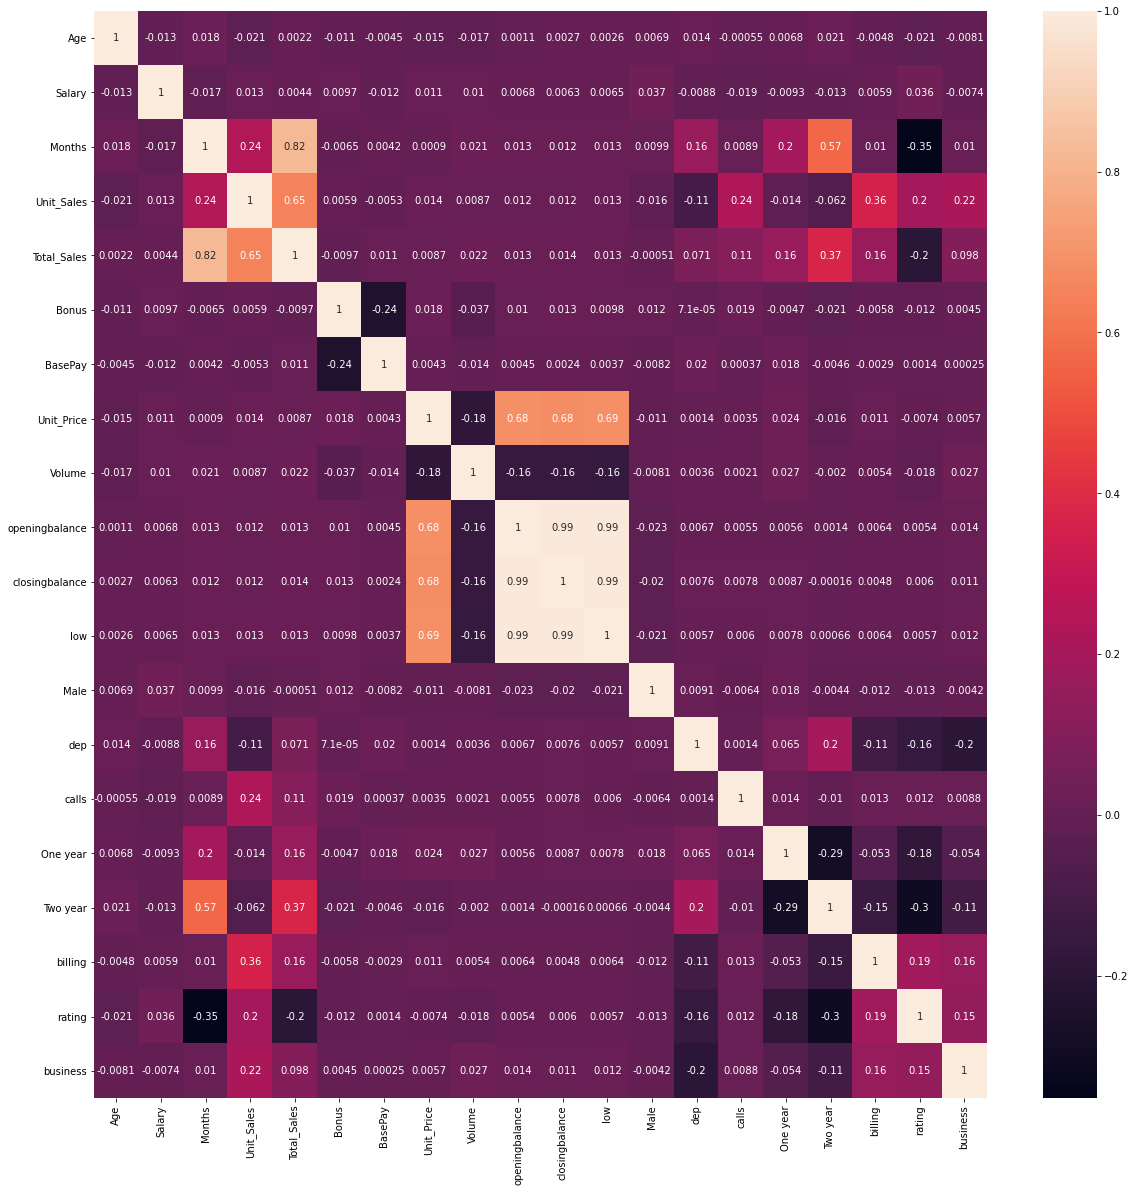

In [62]:
plt.figure(figsize=[20,20])
sns.heatmap(hr_data.corr(),annot=True)   

From the above map, it is clear that there is more relation between opening balance, closing balance and low. That is there is mutlicollinearity.

In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant.

Splitting th data for further process

In [64]:
y=hr_data['Salary']
x=hr_data.drop(columns=['Salary'])

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

The best way to identify the multicollinearity is to calculate the Variance Inflation Factor (VIF) corresponding to every independent Variable in the Dataset.
VIF tells us about how well an independent variable is predictable using the other independent variables.

VIF is another commonly used tool to detect whether multicollinearity exists in a regression model. 
It measures how much the variance (or standard error) of the estimated regression coefficient is inflated due to collinearity.

And it is best to Remove some of the highly correlated independent variables.

Here I am calculating the varaince of each column in the training dataset.

In [66]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [67]:
vif.round(1)

,VIF Factor,features
0,41.7,Age
1,17.8,Months
2,21.7,Unit_Sales
3,18.6,Total_Sales
4,3.2,Bonus
5,69.6,BasePay
6,17.4,Unit_Price
7,4.2,Volume
8,816.1,openingbalance
9,839.7,closingbalance


VIF ~ 1: Negligible || 1<VIF<5 : Moderate || VIF>5 : Extreme

The columns with more variance should be removed in order to make the data more reliable and easy for modeling. Here we have many columns with more varaince.

Since low column has the highest variance first I am removing this from the set

In [68]:
x=x.drop(columns=['low'],axis=1)

Now again calculating the VIF to see the change in data.

In [69]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,41.7,Age
1,17.8,Months
2,21.7,Unit_Sales
3,18.6,Total_Sales
4,3.2,Bonus
5,69.6,BasePay
6,17.3,Unit_Price
7,4.2,Volume
8,520.6,openingbalance
9,515.5,closingbalance


Now, I am removing openingbalance column as it has extremely more VIF value.

In [70]:
x=x.drop(columns=['openingbalance'],axis=1)

Now, calculating the VIF for remaining columns in the data

In [71]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,41.7,Age
1,17.8,Months
2,21.7,Unit_Sales
3,18.6,Total_Sales
4,3.2,Bonus
5,69.6,BasePay
6,17.1,Unit_Price
7,4.2,Volume
8,17.2,closingbalance
9,2.0,Male


Now we can see that we have 2 digit numbers. The values have dropped gradually. But still we have to remove column with highest VIF. now removing basepay.

In [72]:
x=x.drop(columns=['BasePay'],axis=1)

Checking the changes in VIF value after removing the base pay column

In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,21.7,Age
1,16.9,Months
2,20.4,Unit_Sales
3,17.4,Total_Sales
4,3.2,Bonus
5,16.7,Unit_Price
6,4.0,Volume
7,16.9,closingbalance
8,2.0,Male
9,1.6,dep


Now, removing Unit_Sales column

In [74]:
x=x.drop(columns=['Unit_Sales'],axis=1)

Again caluculating the VIF values for remaining columns.

In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,19.9,Age
1,13.6,Months
2,7.2,Total_Sales
3,3.2,Bonus
4,16.6,Unit_Price
5,3.9,Volume
6,16.9,closingbalance
7,2.0,Male
8,1.6,dep
9,9.8,calls


Now, dropping Age column

In [76]:
x=x.drop(columns=['Age'],axis=1)

In [77]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,13.2,Months
1,7.1,Total_Sales
2,3.1,Bonus
3,16.1,Unit_Price
4,3.6,Volume
5,16.4,closingbalance
6,2.0,Male
7,1.6,dep
8,7.9,calls
9,1.9,One year


Now drop the closing balance column as it has more VIF value

In [78]:
x=x.drop(columns=['closingbalance'],axis=1)

Calculating VIF for remaing columns

In [79]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,13.1,Months
1,7.1,Total_Sales
2,3.1,Bonus
3,6.5,Unit_Price
4,3.6,Volume
5,2.0,Male
6,1.5,dep
7,7.7,calls
8,1.9,One year
9,3.0,Two year


Removing Months column

In [80]:
x=x.drop(columns=['Months'],axis=1)

In [81]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,2.9,Total_Sales
1,3.1,Bonus
2,6.4,Unit_Price
3,3.5,Volume
4,2.0,Male
5,1.5,dep
6,7.7,calls
7,1.7,One year
8,2.1,Two year
9,2.7,billing


In [82]:
x=x.drop(columns=['Unit_Price'],axis=1)

In [83]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,2.9,Total_Sales
1,2.9,Bonus
2,3.5,Volume
3,1.9,Male
4,1.5,dep
5,6.1,calls
6,1.6,One year
7,2.1,Two year
8,2.6,billing
9,1.6,rating


In [84]:
x=x.drop(columns=['calls'],axis=1)

In [85]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,2.8,Total_Sales
1,2.6,Bonus
2,3.0,Volume
3,1.8,Male
4,1.5,dep
5,1.6,One year
6,2.1,Two year
7,2.5,billing
8,1.6,rating
9,1.3,business


Now we can see that all the VIF values are in control.

<AxesSubplot:>

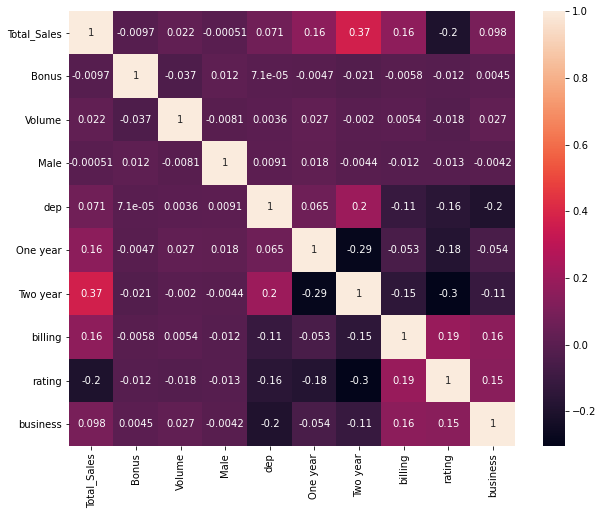

In [88]:
plt.figure(figsize=[10,8])
sns.heatmap(x.corr(),annot=True)   

Now, we can see that there is no mutli collinearity in the data. SO, now we can go further and model our data.

### Data Modeling

Now, I am splitting the data into test and train with test_size=0.2 

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

###### Here I am using Decision tree Regressor as the it is a regression problem. 

###### I choose Decision Tree Regressor as there is no linear relationship between the target variable SALARY and any other feature variables in the data. So when there is non-linear relationship in the data the Decision Tree Regressor brings the best outcomes. They can work good on uniformly distributed data.

I fit the x_train and y_train using the regressor function

### DECISION TREE REGRESSOR MODEL

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=100)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=100)

Checking the shape of test and train

In [91]:
print(x_train.shape)
print(x_test.shape)

(4039, 10)
(1010, 10)


In [92]:
print(y_train.shape)
print(y_test.shape)

(4039,)
(1010,)


Knowing the scores of both test and train data.

In [93]:
print("Training score:",regressor.score(x_train,y_train))
print("Testing score:",regressor.score(x_test,y_test))

Training score: 1.0
Testing score: -0.8967580213939657


As we can see that the model is performing good on Training dataset and not on test dataset which shoes that model is overfit.

In [94]:
pred=regressor.predict(x_test)

In [191]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 64909.09488118812
Root Mean Squared Error of test dataset: 80323.76501177333


In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -0.8967580213939657


##### HYPER PARAMETER TUNING USING GRID CV METHOD

GridSearchCV is a method to search the candidate best parameters exhaustively from the grid of given parameters. Target estimator (model) and parameters for search need to be provided for this cross-validation search method.GridSearchCV is useful when we are looking for the best parameter for the target model and dataset.

So here I am using GridSeachCV method to find the best parameters for decision tree regressor.

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
#making the instance
model= DecisionTreeRegressor(random_state=1205)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model.best_params_)
#Prediction
grid_cv_prediction=model.predict(x_test)

Best Hyper Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}


Given above are our best parameters for the model.

In [99]:
print("Training score:",model.score(x_train,y_train))
print("Testing score:",model.score(x_test,y_test))

Training score: 0.14876469974509265
Testing score: -0.09869253838487135


In [190]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_cv_prediction))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test, grid_cv_prediction)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, grid_cv_prediction)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 51684.006219741175
Root Mean Squared Error of test dataset: 61133.06632846143
r2 score for perfect model is -0.09869253838487135


###### As we know that decision tree regressor tends to overfit the data. As it is seen it is clear that it is working good on training model and not on test which means it is overfit. So, now i will use random forests inorder to make the model much more reliable.

### RANDOM FORESTS

I am using the default values in buiding the starting model.

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf_1_regressor = RandomForestRegressor(n_estimators = 100, random_state =1)
rf_1_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [104]:
print("Training score:",rf_1_regressor.score(x_train,y_train))
print("Testing score:",rf_1_regressor.score(x_test,y_test))

Training score: 0.8474146255308276
Testing score: -0.07967104711600737


In [105]:
rf_1_prediction=rf_1_regressor.predict(x_test)

In [189]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_1_prediction))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test, rf_1_prediction)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_1_prediction)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 51464.25526891089
Root Mean Squared Error of test dataset: 60601.56223728373
r2 score for perfect model is -0.07967104711600737


Here are the metrics values for the random forest model.
When compared to the decision tree model the MAE and RMSE are less in value. Which means the Random forest is working better than the decision trees.

Inorder to yield much more good results i will tune the hyperparameters in random forests also.

###### HYPERPARAMETER TUNING USING GRID CV METHOD FOR RANDOM FORESTS

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [108]:
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [109]:
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 15}


These are the best parameters. Now building a model using these parameteres

In [123]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(bootstrap= True, max_depth= 5, max_features='log2', n_estimators=15)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=15)

In [124]:
print("Training score:",rfr.score(x_train,y_train))
print("Testing score:",rfr.score(x_test,y_test))

Training score: 0.03627401309472211
Testing score: 0.0016225374683012106


In [146]:
rfr_pred=rfr.predict(x_test)

In [188]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfr_pred))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rfr_pred)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 50178.12205393546
Root Mean Squared Error of test dataset: 58275.42863413414
r2 score for perfect model is 0.0016225374683012106


We are getting a Positive score for test dataset
But i will also try tuning using randomized cv and see if there is any change.

In contrast to GridSearchCV in the RandomizedCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

###### RANDOMIZED CV METHOD FOR RANDOM FORESTS

In [125]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
max_depth.append(None)
bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,'bootstrap': bootstrap}


FIRST I AM FITTING IT FOR 3 FOLDS.

In [126]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,
            scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [127]:
rfr_random.fit(x_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [128]:
print(rfr_random.best_params_)

{'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


These are the best parameters for it. Now i will create a model using these parameters.

In [129]:
from sklearn.ensemble import RandomForestRegressor
rand_cv_rfr = RandomForestRegressor(n_estimators=6,max_features='log2',max_depth=5, bootstrap=True)
rand_cv_rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=6)

In [130]:
print("Training score:",rand_cv_rfr.score(x_train,y_train))
print("Testing score:",rand_cv_rfr.score(x_test,y_test))

Training score: 0.03377887516438849
Testing score: 0.000352599003412557


In [149]:
rand_predict=rand_cv_rfr.predict(x_test)

In [187]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rand_predict))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test,rand_predict)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rand_predict)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 50093.86614957989
Root Mean Squared Error of test dataset: 58312.480096178886
r2 score for perfect model is 0.000352599003412557


FITTING IT FOR 5 FOLDS.

In [131]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,
            scoring='neg_mean_absolute_error', cv = 5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [132]:
rfr_random.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [133]:
print(rfr_random.best_params_)

{'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


These are the best parameters for 5 folds. Now training the data with this parameters.

In [134]:
from sklearn.ensemble import RandomForestRegressor
rand_cv_rfr2 = RandomForestRegressor(n_estimators=6, max_features='log2', max_depth=5, bootstrap=True)
rand_cv_rfr2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=6)

In [151]:
rand1_predict=rand_cv_rfr2.predict(x_test)

In [135]:
print("Training score:",rand_cv_rfr.score(x_train,y_train))
print("Testing score:",rand_cv_rfr.score(x_test,y_test))

Training score: 0.03377887516438849
Testing score: 0.000352599003412557


In [186]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rand1_predict))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test,rand1_predict)))


from sklearn.metrics import r2_score
r2 = r2_score(y_test, rand1_predict)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 50328.06056179987
Root Mean Squared Error of test dataset: 58457.49625705499
r2 score for perfect model is -0.004625590345524122


FITTING FOR 4 FOLDS

In [136]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,
            scoring='neg_mean_absolute_error', cv = 4, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [137]:
rfr_random.fit(x_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=5,
                                                   max_features='log2',
                                                   n_estimators=15),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [138]:
print(rfr_random.best_params_)

{'n_estimators': 13, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [139]:
from sklearn.ensemble import RandomForestRegressor
rand_cv_rfr3 = RandomForestRegressor(n_estimators=13,max_features='log2',max_depth=5, bootstrap=True)
rand_cv_rfr3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=13)

In [153]:
rand2_predict=rand_cv_rfr3.predict(x_test)

In [140]:
print("Training score:",rand_cv_rfr3.score(x_train,y_train))
print("Testing score:",rand_cv_rfr3.score(x_test,y_test))

Training score: 0.03516760098534211
Testing score: -0.00797855327903707


In [185]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rand2_predict))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test,rand2_predict)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rand2_predict)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 50387.90482006253
Root Mean Squared Error of test dataset: 58554.96667229734
r2 score for perfect model is -0.00797855327903707


FITTING FOR 2 FOLDS

In [141]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,
            scoring='neg_mean_absolute_error', cv = 2, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [142]:
rfr_random.fit(x_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(max_depth=5,
                                                   max_features='log2',
                                                   n_estimators=15),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [143]:
print(rfr_random.best_params_)

{'n_estimators': 5, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [144]:
from sklearn.ensemble import RandomForestRegressor
rand_cv_rfr4 = RandomForestRegressor(n_estimators=5,max_features='log2',max_depth=5, bootstrap=True)
rand_cv_rfr4.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=5)

In [155]:
rand3_predict=rand_cv_rfr4.predict(x_test)

In [145]:
print("Training score:",rand_cv_rfr4.score(x_train,y_train))
print("Testing score:",rand_cv_rfr4.score(x_test,y_test))

Training score: 0.030169476302333686
Testing score: -0.015573445958340315


In [183]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rand3_predict))
print('Root Mean Squared Error of test dataset:', np.sqrt(metrics.mean_squared_error(y_test,rand3_predict)))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rand3_predict)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 50586.29600175008
Root Mean Squared Error of test dataset: 58775.15196966809
r2 score for perfect model is -0.015573445958340315


Here I am comparing all the scores

In [238]:
scores={'Model':['Decison Tree','Decison tree with GRID CV','Random Forests','Random Forest with GRID CV','Random forest with RANDAMISED CV-3',
                  'Random forest with RANDAMISED CV-5 ','Random forest with RANDAMISED CV-4','Random forest with RANDAMISED CV-2'],
         'MAE':['64909.09','51684.00','51464.25','50178.12','50093.86','50328.06', '50387.90','50586.29'],
         'RMSE':['80323.76','61133.06',' 60601.56','58275.42','58312.48','58457.49','58554.96','58775.15'],
        'R2 value':['-0.896','-0.098',' -0.079','0.001',' 0.00035', '-0.004','-0.007',' -0.0155'],}

In [239]:
df = pd.DataFrame(scores, columns = ['Model','MAE','RMSE','R2 value'])
df

,Model,MAE,RMSE,R2 value
0,Decison Tree,64909.09,80323.76,-0.896
1,Decison tree with GRID CV,51684.00,61133.06,-0.098
2,Random Forests,51464.25,60601.56,-0.079
3,Random Forest with GRID CV,50178.12,58275.42,0.001
4,Random forest with RANDAMISED CV-3,50093.86,58312.48,0.00035
5,Random forest with RANDAMISED CV-5,50328.06,58457.49,-0.004
6,Random forest with RANDAMISED CV-4,50387.90,58554.96,-0.007
7,Random forest with RANDAMISED CV-2,50586.29,58775.15,-0.0155


r > 0 indicates a positive association. r < 0 indicates a negative association. Values of r near 0 indicate a very weak linear relationship. The strength of the linear relationship increases as r moves away from 0 toward -1 or 1.

###### When we analyze the above values of the metrics for all the models we trained the Random Forest with GRID CV technique has the good score compared to all others.
###### It has MAE =50178.12   ||   RMSE=58275.42   ||   R2 value=0.001
        

###### VISUAL INTERPRETATION OF THE IMPORTANT FEATURES

Visualsing the decison tree regressor to find the imp feature.

In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
decision_tree = DecisionTreeRegressor(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(x, y)
r = export_text(decision_tree)
print(r)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 20.38
|   |   |--- value: [121530.92]
|   |--- feature_0 >  20.38
|   |   |--- value: [97794.29]
|--- feature_3 >  0.50
|   |--- feature_8 <= 0.50
|   |   |--- value: [100457.18]
|   |--- feature_8 >  0.50
|   |   |--- value: [108200.16]



It is showing feature 3 is the one with most information. To know what is that feature lets plot a graph for feature importance and know which feature is the most important and has the highest contribution to the model.

In [234]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [235]:
reg= ExtraTreesRegressor()
reg.fit(x_train,y_train)
reg.feature_importances_

array([0.33206358, 0.2417396 , 0.27303726, 0.01178219, 0.0249386 ,
       0.02499158, 0.01491818, 0.03930122, 0.001473  , 0.03575479])

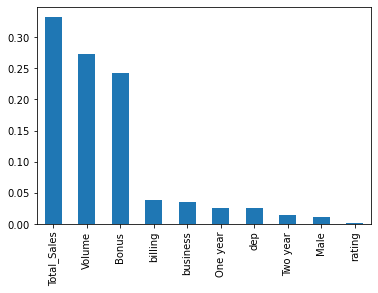

In [237]:
feat_importances = pd.Series(reg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

This shows the most important feature in the training set. So, it is clear that the Total_Sales is the most important feature and following it are the Volume and the bonus features

The features that influence the salary most are the Total_Sales,volume and Bonus.

###### RESULT AND RECOMMONDATIONS

Random Forest with GRID CV that has 3 folds gave us good values they are

MSE:50178.12 || RMSE:58275.42 || R2 Value:0.001
            
The decison trees and Random forests work good when there is plenty of data. Here after removing the columns that had extremely high VIF values like base_pay,business, openingbalance, closingbalance, low were removed, the data got reduced to 10 columns. So if we had more column which influence the salary then the model would have yielded much more better R2 values.
